## Simple Moving Average Strategy Backtesting

#### Objective
The objective of this project is to implement and backtest a basic trading strategy based on simple moving averages using historical price data 


### Background 
Moving averages of a stock is the average price of a security over a duration and is used to help smooth out price data by creating a constantly updated average price. 
##### Moving average Crossover 
For this project, I will be using the Moving average Crossover strategy. This strategy is typically used by traders to identify changes in trend direction in financial markets and involves the use of two moving averages with different periods, where one is typically a shorter-term moving average and the other is a longer-term moving average. 
"golden cross": buy signal. This occurs when the shorter-term price average is moving upwards "faster" than the long-term average. 
"death cross": sell signal. short-term price is falling quicker than the average long-term price. 
##### Summary
Overall, the Moving Average Crossover strategy aims to capture trends in asset prices by identifying key points of trend reversal. This is a simple strategy that can be used when complemented with proper risk management and additional analysis techniques. 

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('MSFT (1).csv')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-16,126.750000,129.380005,126.459999,128.929993,122.959991,30112200
1,2019-05-17,128.309998,130.460007,127.919998,128.070007,122.139816,25770500
2,2019-05-20,126.519997,127.589996,125.760002,126.220001,120.375465,23706900
3,2019-05-21,127.430000,127.529999,126.580002,126.900002,121.023979,15293300
4,2019-05-22,126.620003,128.240005,126.519997,127.669998,121.758331,15396500


In [3]:
#calculating short term 50 day moving avergae for shorter terms and 200 day for longer term 
short_window = 20 
df['Short_MA'] = df['Close'].rolling(window = short_window, min_periods = 1).mean()

long_window = 50 
df['Long_MA'] = df['Close'].rolling(window = long_window, min_periods = 1).mean()
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Short_MA,Long_MA
1254,2024-05-09,410.570007,412.720001,409.100006,412.320007,411.577637,14689700,406.253000,413.728201
1255,2024-05-10,412.940002,415.380005,411.799988,414.739990,413.993256,13402300,405.895000,413.750200
1256,2024-05-13,418.010010,418.350006,410.820007,413.720001,412.975098,15440200,405.898999,413.714600
1257,2024-05-14,412.019989,417.489990,411.549988,416.559998,415.809998,15109300,405.998000,413.747400
1258,2024-05-15,417.899994,423.809998,417.269989,423.079987,423.079987,22217500,406.559999,414.156000


Now we will generate trade signals. the golden cross will be generated when the short-term sMA crosses above the long-term SMA, and the death cross will be generated when a short-term SMA crosses below the long-term SMA. Note that a golden cross occurs when (1) in the previous period when Short_MA was below Long_Ma (2) in the current period, Short_Ma is > Long_MA 

In [4]:
#generating a solumn with zeros 
df['Signal'] = 0

#golden cross 
df.loc[(df['Short_MA'] > df['Long_MA']) & (df['Short_MA'].shift(1) <= df['Long_MA'].shift(1)), 'Signal'] = 1

#death cross 
df.loc[(df['Short_MA'] < df['Long_MA']) & (df['Short_MA'].shift(1) >= df['Long_MA'].shift(1)), 'Signal'] = -1
df

,Date,Open,High,Low,Close,Adj Close,Volume,Short_MA,Long_MA,Signal
0,2019-05-16,126.750000,129.380005,126.459999,128.929993,122.959991,30112200,128.929993,128.929993,0
1,2019-05-17,128.309998,130.460007,127.919998,128.070007,122.139816,25770500,128.500000,128.500000,0
2,2019-05-20,126.519997,127.589996,125.760002,126.220001,120.375465,23706900,127.740000,127.740000,0
3,2019-05-21,127.430000,127.529999,126.580002,126.900002,121.023979,15293300,127.530001,127.530001,0
4,2019-05-22,126.620003,128.240005,126.519997,127.669998,121.758331,15396500,127.558000,127.558000,0
...,...,...,...,...,...,...,...,...,...,...
1254,2024-05-09,410.570007,412.720001,409.100006,412.320007,411.577637,14689700,406.253000,413.728201,0
1255,2024-05-10,412.940002,415.380005,411.799988,414.739990,413.993256,13402300,405.895000,413.750200,0
1256,2024-05-13,418.010010,418.350006,410.820007,413.720001,412.975098,15440200,405.898999,413.714600,0
1257,2024-05-14,412.019989,417.489990,411.549988,416.559998,415.809998,15109300,405.998000,413.747400,0


In [5]:
import matplotlib.pyplot as plt

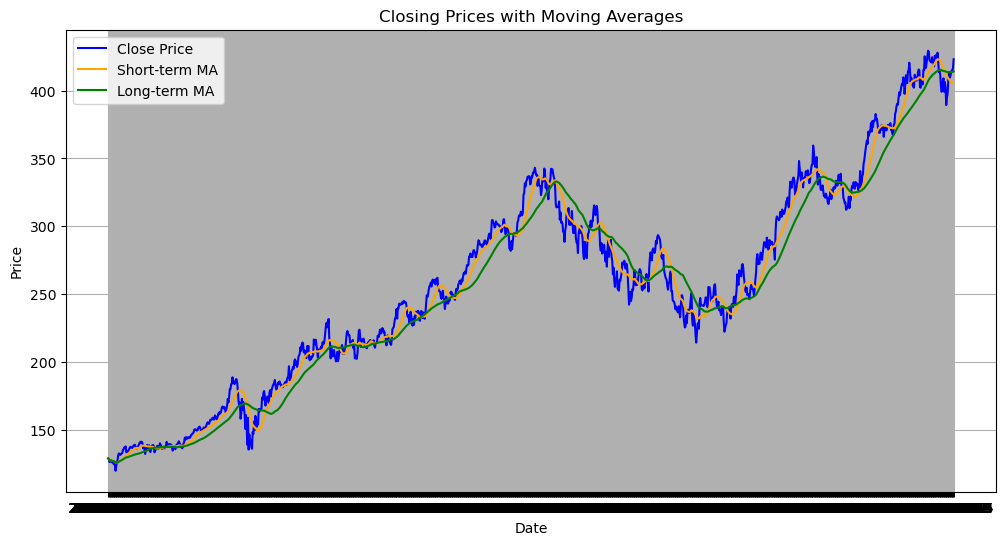

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')

# Plotting short-term moving average
plt.plot(df['Date'], df['Short_MA'], label='Short-term MA', color='orange')

# Plotting long-term moving average
plt.plot(df['Date'], df['Long_MA'], label='Long-term MA', color='green')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Closing Prices with Moving Averages')
plt.legend()
plt.grid(True)
plt.show()

We will now backtest and stimulate the strategy.

In [7]:
#intializing trading variables 
portfolio_value = 10000 
position = 0 # 0 = no position , 1 = long, -1 = short
entry_price = 0 #storing entry price for the current positon 
trade_log = []
for index, row in df.iterrows(): 
    #cross signal 
    if row['Signal'] == 1 and position == 0: 
        position = 1 #enter long posiition
        entry_price = row['Close']
        print(f" buy at {row['Date']} for ${entry_price}") 
    #death signal 
    elif row['Signal']== -1 and position == 1: 
        position = 0 #exit long position 
        exit_price = row['Close']
        trade_profit = (exit_price - entry_price)  #calculating trade profit/loss
        portfolio_value += trade_profit 
        trade_log.append({'entry_date': row['Date'], 'entry_price': entry_price, 
                          'exit_date': row['Date'], 'exit_price': exit_price, 
                          'position': 1})
        print(f" sell at {row['Date']} for ${exit_price}. Profit ${trade_profit}")
   
final_portfolio_val = portfolio_value 
print(f" Final Portfolio Value: ${final_portfolio_val}")
    

 buy at 2019-06-18 for $135.160004
 sell at 2019-08-23 for $133.389999. Profit $-1.7700049999999976
 buy at 2019-09-23 for $139.139999
 sell at 2020-03-13 for $158.830002. Profit $19.69000300000002
 buy at 2020-04-22 for $173.520004
 sell at 2020-09-28 for $209.440002. Profit $35.91999799999999
 buy at 2020-10-21 for $214.800003
 sell at 2020-12-14 for $214.199997. Profit $-0.6000060000000076
 buy at 2020-12-18 for $218.589996
 sell at 2021-03-23 for $237.580002. Profit $18.990005999999994
 buy at 2021-04-07 for $249.899994
 sell at 2021-05-26 for $251.490005. Profit $1.590011000000004
 buy at 2021-06-18 for $259.429993
 sell at 2021-10-06 for $293.109985. Profit $33.67999199999997
 buy at 2021-10-27 for $323.170013
 sell at 2022-01-06 for $313.880005. Profit $-9.290008
 buy at 2022-04-04 for $314.970001
 sell at 2022-04-26 for $270.220001. Profit $-44.75
 buy at 2022-07-21 for $264.839996
 sell at 2022-07-25 for $258.829987. Profit $-6.010008999999968
 buy at 2022-07-28 for $276.41000

We will now evaluate performance using metrics such as total return and average return per trade.

In [8]:
#total return 
total_return = ((final_portfolio_val- 10000)/10000)* 100
total_return 

1.1479998799999704

In [9]:
#average return per trade
num_trade = len(trade_log)
avg_return_per_trade = (total_return /num_trade)*100
avg_return_per_trade 

8.199999142856932

Overall, both metrics indicate that the trading strategy produced positive results during the backtest period. However, it's essential to consider other performance metrics and conduct further analysis to assess the strategy's robustness, risk-adjusted return, and potential for future performance.